In [64]:
import pandas as pd           
import matplotlib.pyplot as plt

[0.1666666666666666, 0.1818181818181818, 0.1904761904761904]


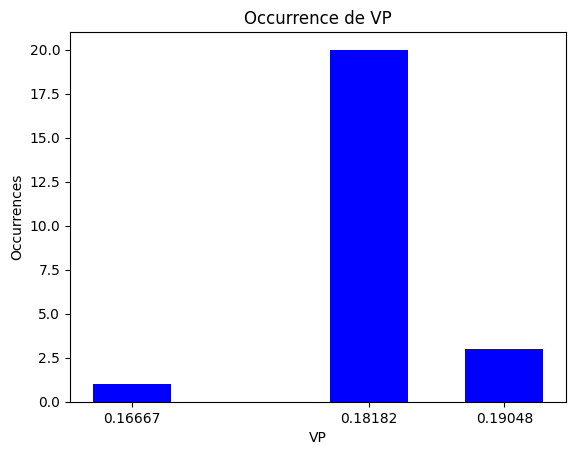

{0.1818181818181818: 16, 0.1666666666666666: 8}

<Figure size 640x480 with 0 Axes>

In [65]:
def analyse_differents_vp(data_set):
    occurence={}
    df=pd.read_csv(data_set)
    for i in df["Vp"] : 
        if i not in occurence.keys() :
            occurence[i]=1
        else:
            occurence[i]=occurence[i]+1
    return occurence

def analyse_mean_vp(df):
    Vpmean=0
    j=0
    for i in df["Vp"] : 
        j=j+1
        Vpmean=i+Vpmean
        
    return Vpmean/j

def analyse_differents_numberOfTurn(data_set):
    occurence={}
    df=pd.read_csv(data_set)
    for i in df["numberOfTurn"] : 
        if i not in occurence.keys() :
            occurence[i]=1
        else:
            occurence[i]=occurence[i]+1
    return occurence


def graph_NumberOfTurn(data_set):
   
    donnees=analyse_differents_numberOfTurn(data_set)
    tours = list(donnees.keys())
    occurrences = list(donnees.values())
    largeur_barre = max(0.5, min(0.15 * len(tours), 0.5)) 
    # Créer le graphique à barres
    plt.bar(tours, occurrences, color='blue',width=largeur_barre)

    # Ajouter des titres et des libellés
    plt.title('Occurrences de tours')
    plt.xlabel('Nombre de tours')
    plt.ylabel('Occurrences')
    plt.xticks(tours)
    plt.show()
    plt.clf()
    
def graph_Vp(data_set) :   
    
    donnees=analyse_differents_vp(data_set)
    vps = list(donnees.keys())
    print(vps)
    occurrences = list(donnees.values())
    
    # Créer le graphique à barres
    plt.bar(vps, occurrences, color='blue', width=0.005)

    # Ajouter des titres et des libellés
    plt.title('Occurrence de VP')
    plt.xlabel('VP')
    plt.ylabel('Occurrences')
    plt.xticks(vps)
    plt.show()
    plt.clf()


    

graph_Vp("csv\data2.csv")
analyse_differents_vp("csv\data1.csv")


In [66]:
import os


def create_csv_link(dossier):
    # Vérifier si le chemin spécifié est un dossier
    if not os.path.isdir(dossier):
        return "Le chemin spécifié n'est pas un dossier."

    # Initialiser le compteur de fichiers
    nombre_fichiers = 0
    liste_of_df=[]
    # Parcourir tous les éléments du dossier
    for element in os.listdir(dossier):
        chemin_element = os.path.join(dossier, element)
        # Vérifier si l'élément est un fichier
        
        df=pd.read_csv(chemin_element)
        liste_of_df.append(df)

    return liste_of_df


def all_graph_stat_vp(df_liste):
        occurence={}
        for i in df_liste : 
            print(i["order"])
            if len(i["order"][0].split(",")) in occurence.keys() :
                occurence[len(i["order"][0].split(","))]=[analyse_mean_vp(i)+occurence[len(i["order"][0].split(","))][0],occurence[len(i["order"][0].split(","))][1]+1]
            else :
                occurence[len(i["order"][0].split(","))]=[analyse_mean_vp(i),1]
        reponse={}
        for key,value in occurence.items():
            print(value)
            reponse[key]=(value[0]/value[1])
        return reponse


liste_of_df=create_csv_link("csv")   
all_graph_stat_vp(liste_of_df)

0     A0,A1,A2,A3
1     A0,A1,A3,A2
2     A0,A2,A1,A3
3     A0,A2,A3,A1
4     A0,A3,A1,A2
5     A0,A3,A2,A1
6     A1,A0,A2,A3
7     A1,A0,A3,A2
8     A1,A2,A0,A3
9     A1,A2,A3,A0
10    A1,A3,A0,A2
11    A1,A3,A2,A0
12    A2,A0,A1,A3
13    A2,A0,A3,A1
14    A2,A1,A0,A3
15    A2,A1,A3,A0
16    A2,A3,A0,A1
17    A2,A3,A1,A0
18    A3,A0,A1,A2
19    A3,A0,A2,A1
20    A3,A1,A0,A2
21    A3,A1,A2,A0
22    A3,A2,A0,A1
23    A3,A2,A1,A0
Name: order, dtype: object
0      A0,A1,A2,A3,A4
1      A0,A1,A2,A4,A3
2      A0,A1,A3,A2,A4
3      A0,A1,A3,A4,A2
4      A0,A1,A4,A2,A3
            ...      
115    A4,A3,A0,A2,A1
116    A4,A3,A1,A0,A2
117    A4,A3,A1,A2,A0
118    A4,A3,A2,A0,A1
119    A4,A3,A2,A1,A0
Name: order, Length: 120, dtype: object
0      A0,A1,A2,A3,A4,A5
1      A0,A1,A2,A3,A5,A4
2      A0,A1,A2,A4,A3,A5
3      A0,A1,A2,A4,A5,A3
4      A0,A1,A2,A5,A3,A4
             ...        
715    A5,A4,A3,A0,A2,A1
716    A5,A4,A3,A1,A0,A2
717    A5,A4,A3,A1,A2,A0
718    A5,A4,A3,A2,A0,A1
719    A5

TypeError: 'int' object is not subscriptable